In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
labels = ['PNEUMONIA', 'NORMAL']
img_size = 150


In [ ]:
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Loading the Dataset
train = get_data('/content/drive/MyDrive/CNN pneumonia/chest_xray/train')
test = get_data('/content/drive/MyDrive/CNN pneumonia/chest_xray/test')
val = get_data('/content/drive/MyDrive/CNN pneumonia/chest_xray/val')

<ipython-input-5-c67035924b0b>:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(data)


In [ ]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Pneumonia")
    else:
        l.append("Normal")
print(l)
print(l.count('Pneumonia'))
l.count('Normal')

['Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia', 'Pneumonia'

1341

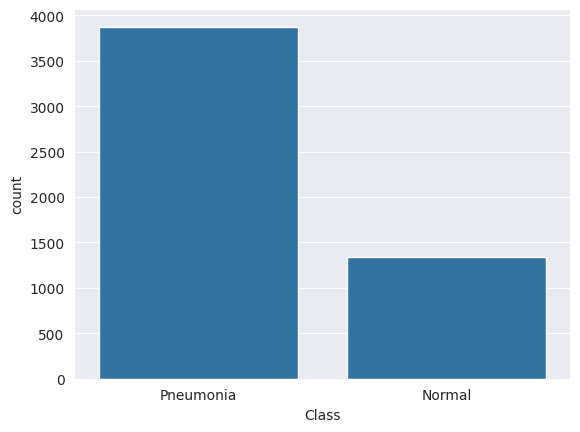

In [ ]:
df = pd.DataFrame({'Class': l})
sns.set_style('darkgrid')
sns.countplot(data=df, x='Class')
plt.show()

In [ ]:
x_train = np.array([i[0] for i in train]) / 255.0
y_train = np.array([i[1] for i in train])

x_val = np.array([i[0] for i in val]) / 255.0
y_val = np.array([i[1] for i in val])

x_test = np.array([i[0] for i in test]) / 255.0
y_test = np.array([i[1] for i in test])

x_train = x_train.reshape(-1, img_size, img_size, 1)
x_val = x_val.reshape(-1, img_size, img_size, 1)
x_test = x_test.reshape(-1, img_size, img_size, 1)

In [ ]:
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)
X_val = x_val.reshape(x_val.shape[0], -1)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,  # Adjust max_depth to control tree depth
    min_samples_split=5,  # Adjust min_samples_split
    min_samples_leaf=2,  # Adjust min_samples_leaf
    random_state=42
)
rf_classifier.fit(X_train, y_train)
# Create and train the Random Forest classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
classification_rep = classification_report(y_val, y_val_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{classification_rep}")

Accuracy: 0.5625
Confusion Matrix:
[[8 0]
 [7 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      1.00      0.70         8
           1       1.00      0.12      0.22         8

    accuracy                           0.56        16
   macro avg       0.77      0.56      0.46        16
weighted avg       0.77      0.56      0.46        16



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

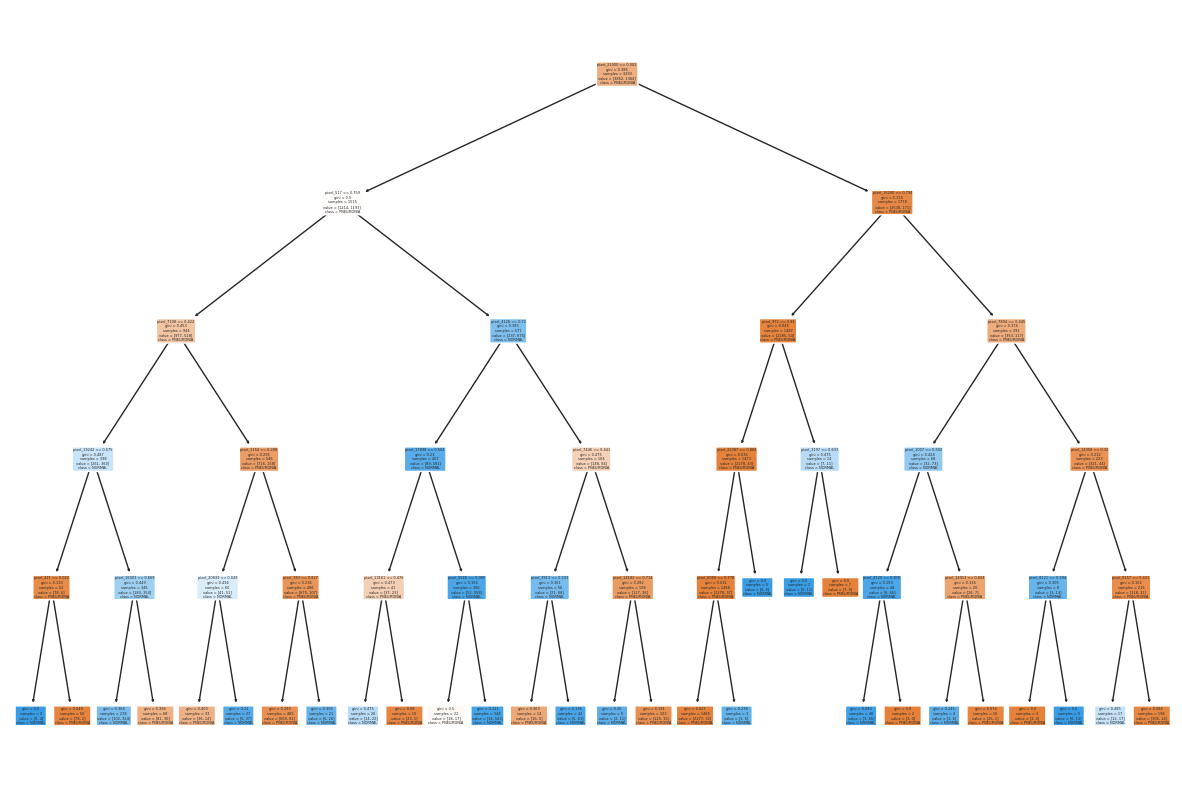

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(rf_classifier[0], filled=True, feature_names=[f'pixel_{i}' for i in range(X_val.shape[1])], class_names=labels, rounded=True)
plt.show()
